# Assignment on preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Loading the dataset into python environment

In [55]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Files\Data Science\Assignments\Assignment 4\titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Making ‘PassengerId’ as the index column

In [56]:
df=df.set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking the basic details of the dataset

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [58]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Filling all the missing values present in all the columns in the dataset

### Filling object type missing data

In [59]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [60]:
obj_na_columns = ['Cabin', 'Embarked']
df[obj_na_columns] = df[obj_na_columns].fillna('Unknown')

In [61]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

### Filling numerical type missing data

In [62]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [63]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

__All the missing values have been replaced__

## Checking and handling outliers in at least 3 columns in the dataset

### Checking outliers using visual method

In [64]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
Three_columns = ['Age', 'Fare', 'SibSp']

Text(0.5, 0, 'Variables')

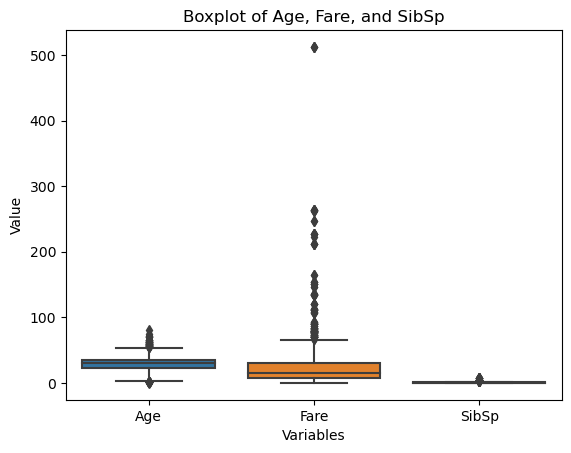

In [66]:
sns.boxplot(data=df[Three_columns])
plt.title('Boxplot of Age, Fare, and SibSp')
plt.ylabel('Value')
plt.xlabel('Variables')

### Handling outliers

In [67]:
z_scores = stats.zscore(df[['Age', 'Fare', 'SibSp']])

In [68]:
z_scores.mean()

Age      2.232906e-16
Fare     3.987333e-18
SibSp    4.386066e-17
dtype: float64

In [69]:
z_scores = stats.zscore(df[['Age', 'Fare', 'SibSp']])
abs_z_scores = abs(z_scores)
threshold = 2.5
outliers = (abs_z_scores < threshold).all(axis=1)
df_new=df
df_new = df_new[outliers]

Text(0.5, 0, 'Variables')

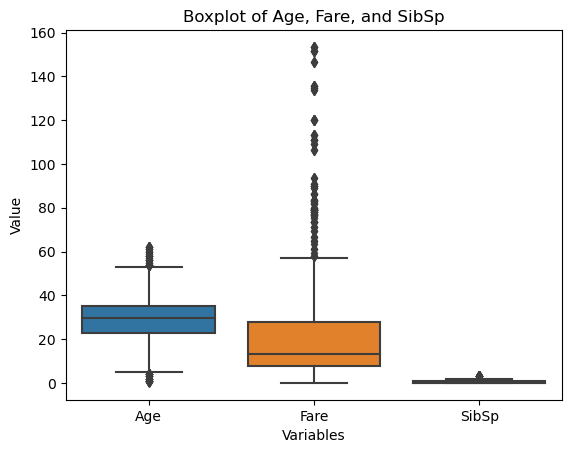

In [70]:
sns.boxplot(data=df_new[Three_columns])
plt.title('Boxplot of Age, Fare, and SibSp')
plt.ylabel('Value')
plt.xlabel('Variables')

__From this box plot it is clear that the rows that are identified as outliers based on the z-score criterion are removed__ 

## Min max scaling on the feature set 

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
df2 = df

In [73]:
object_columns = df2.select_dtypes(include='object').columns

In [74]:
df_numeric = df.drop(object_columns, axis=1)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 48.7 KB


__Object columns are excluded for doing min max scaling__

In [75]:
X = df_numeric.drop('Survived', axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
X_scaled

array([[1.        , 0.27117366, 0.125     , 0.        , 0.01415106],
       [0.        , 0.4722292 , 0.125     , 0.        , 0.13913574],
       [1.        , 0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [1.        , 0.36792055, 0.125     , 0.33333333, 0.04577135],
       [0.        , 0.32143755, 0.        , 0.        , 0.0585561 ],
       [1.        , 0.39683338, 0.        , 0.        , 0.01512699]])

 __The numeric features are scaled using min-max , providing scaled features__

__The reason for doing min max scaling on numerical values is that scaling aims to normalize the numerical features, bringing them into similar ranges. Categorical variables, once encoded, become binary (0s and 1s) and are not in need of scaling since they already represent categorical distinctions__